# Objective of the Analysis

The primary objective of this analysis is to explore the most-streamed Spotify songs in 2024. By analyzing the available dataset, we aim to:

1. Identify the top 10 most-streamed songs and artists.
2. Explore the distribution of streams across all songs.
3. Analyze the popularity of songs based on various factors like artist, genre, and specific audio features (e.g., danceability, energy, acousticness).
4. Identify trends or correlations between different song attributes and streaming numbers.
5. Provide insights that can help understand current listening habits and music trends on Spotify.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin1')

# Check the first few rows of the dataframe
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [6]:
# Get general information about the DataFrame 
df.info()

# Get a statistical summary of numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [8]:
# Ver la cantidad de valores faltantes por columna
df.isnull().sum()


Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [10]:
# List of columns to drop
columns_to_drop = [
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
    'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Check the first few rows to confirm the columns were dropped
df.head()


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,1


In [12]:
# Ver la cantidad de valores faltantes por columna
df.isnull().sum()

Track                       0
Album Name                  0
Artist                      5
Release Date                0
ISRC                        0
All Time Rank               0
Track Score                 0
Spotify Streams           113
Spotify Playlist Count     70
Spotify Playlist Reach     72
Spotify Popularity        804
Explicit Track              0
dtype: int64

In [14]:
df['Artist'] = df['Artist'].fillna('Unknown Artist')

In [16]:
# Remove commas from the 'Spotify Streams' column (if present)
df['Spotify Streams'] = df['Spotify Streams'].replace({',': ''}, regex=True)
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].replace({',': ''}, regex=True)
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].replace({',': ''}, regex=True)

# Convert 'Spotify Streams' to numeric, coercing any errors to NaN (if there are invalid entries)
df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'], errors='coerce')
df['Spotify Playlist Count'] = pd.to_numeric(df['Spotify Playlist Count'], errors='coerce')
df['Spotify Playlist Reach'] = pd.to_numeric(df['Spotify Playlist Reach'], errors='coerce')

# Impute missing values with the median of the column
df['Spotify Streams'] = df['Spotify Streams'].fillna(df['Spotify Streams'].median())
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].fillna(df['Spotify Playlist Count'].median())
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].fillna(df['Spotify Playlist Reach'].median())


In [18]:
df['Spotify Popularity'] = df['Spotify Popularity'].fillna(df['Spotify Popularity'].median())

In [20]:
# Verify the column type and check for missing values
print(df.isnull().sum())  # Check if there are any missing values left

Track                     0
Album Name                0
Artist                    0
Release Date              0
ISRC                      0
All Time Rank             0
Track Score               0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Spotify Popularity        0
Explicit Track            0
dtype: int64


In [22]:
#Change the name of the column 'Track' to 'NameSong'.
df.rename(columns={'Track': 'NameSong'}, inplace=True)

# Verify the change
print(df.head())


                     NameSong                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score  Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     3.904709e+08   
1     5/4/2024  USUG12400910             2        545.9     3.237039e+08   
2    3/19/2024  QZJ842400387             3        538.4     6.013093e+08   
3    1/12/2023  USSM12209777             4        444.9     2.031281e+09   
4    5/31/2024  USUG12403398             5        423.3     1.070349e+08   

   Spotify Playlist Count  Spotify Playlist Reach  Spotify Popularit

In [24]:
# Sort the DataFrame by 'Spotify Streams' in descending order
top_10_songs = df[['NameSong', 'Artist', 'Spotify Streams']].sort_values(by='Spotify Streams', ascending=False).head(10)

most_streamed_song = top_10_songs.iloc[0]

# Show the Top 10 and the most played song
print("Top 10 Most Streamed Songs:")
print(top_10_songs)

print("\nMost Streamed Song:")
print(most_streamed_song)




Top 10 Most Streamed Songs:
                                           NameSong         Artist  \
55                                  Blinding Lights     The Weeknd   
4254                                Blinding Lights        xSyborg   
53                                     Shape of You     Ed Sheeran   
1637                                   Shape of You        xSyborg   
132                               Someone You Loved  Lewis Capaldi   
114   Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
19                                        As It Was   Harry Styles   
3406                                      As It Was   Harry Styles   
262                                         Starboy     The Weeknd   
519                                       One Dance          Drake   

      Spotify Streams  
55       4.281469e+09  
4254     4.261328e+09  
53       3.909459e+09  
1637     3.888356e+09  
132      3.427499e+09  
114      3.358704e+09  
19       3.301815e+09  
3406     

In [26]:
# For duplicate values, group by 'NameSong' and get the artist with the most plays and sum the plays.
top_10_unique_songs = df.groupby('NameSong').apply(
    lambda x: x.loc[x['Spotify Streams'].idxmax()]  # Seleccionar el artista con más reproducciones
).reset_index(drop=True)

# Sort by 'Spotify Streams' in descending order to get the top 10 most listened tracks
top_10_songs = top_10_unique_songs[['NameSong', 'Artist', 'Spotify Streams']].sort_values(by='Spotify Streams', ascending=False).head(10)

print("Top 10 Most Streamed Songs:")
print(top_10_songs)


Top 10 Most Streamed Songs:
                                           NameSong           Artist  \
508                                 Blinding Lights       The Weeknd   
3211                                   Shape of You       Ed Sheeran   
3335                              Someone You Loved    Lewis Capaldi   
3442  Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
255                                       As It Was     Harry Styles   
3374                                        Starboy       The Weeknd   
2635                                      One Dance            Drake   
3102                      STAY (with Justin Bieber)    The Kid LAROI   
882                                    Dance Monkey      Tones And I   
451                                        Believer  Imagine Dragons   

      Spotify Streams  
508      4.281469e+09  
3211     3.909459e+09  
3335     3.427499e+09  
3442     3.358704e+09  
255      3.301815e+09  
3374     3.291262e+09  
2635     3.

/var/folders/6q/vt22txkn2872zgnyy8h7p2x40000gn/T/ipykernel_12901/1122069544.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_unique_songs = df.groupby('NameSong').apply(


/var/folders/6q/vt22txkn2872zgnyy8h7p2x40000gn/T/ipykernel_12901/467515720.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Streams', y='NameSong', data=top_10_songs, palette='viridis')


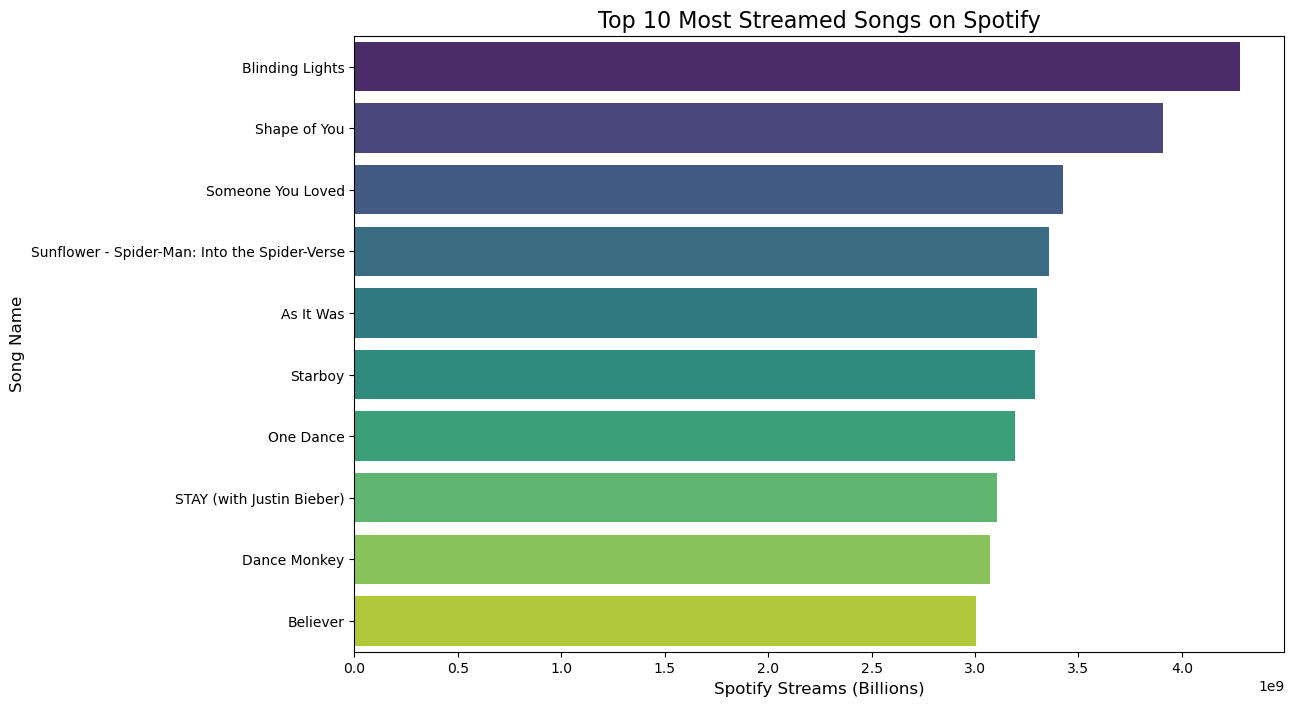

In [28]:
# Sort by 'Spotify Streams' in descending order to get the top 10 most listened tracks
top_10_songs = top_10_unique_songs[['NameSong', 'Artist', 'Spotify Streams']].sort_values(by='Spotify Streams', ascending=False).head(10)

# Create a bar plot to visualize the top 10 most streamed songs
plt.figure(figsize=(12, 8))
sns.barplot(x='Spotify Streams', y='NameSong', data=top_10_songs, palette='viridis')

# Add labels and title
plt.title('Top 10 Most Streamed Songs on Spotify', fontsize=16)
plt.xlabel('Spotify Streams (Billions)', fontsize=12)
plt.ylabel('Song Name', fontsize=12)

# Show the plot
plt.show()


/var/folders/6q/vt22txkn2872zgnyy8h7p2x40000gn/T/ipykernel_12901/528228345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Streams', y='Artist', data=top_artists, palette='viridis')


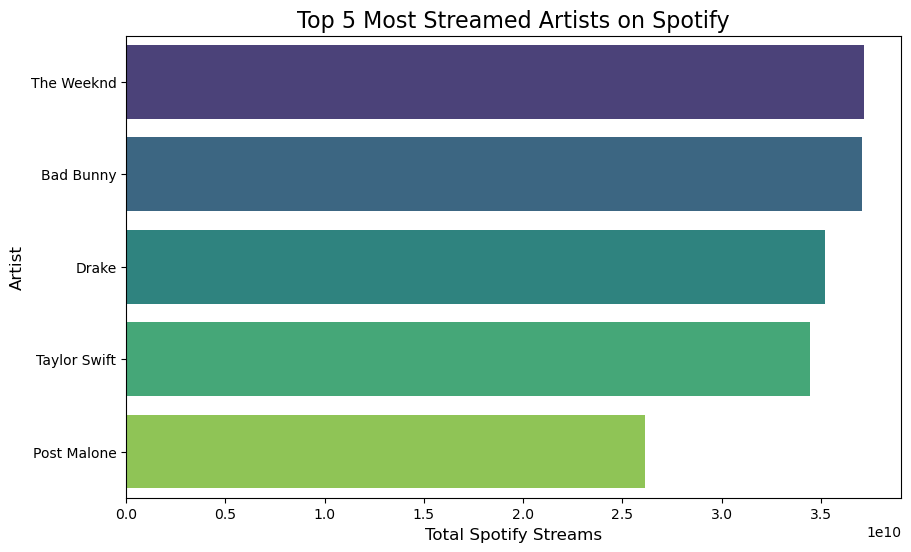

In [30]:
# Group by 'Artist' and sum the Spotify Streams
artist_streams = df.groupby('Artist')['Spotify Streams'].sum().reset_index()

# Sort by total Spotify Streams in descending order and get the Top 5
top_artists = artist_streams.sort_values(by='Spotify Streams', ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Spotify Streams', y='Artist', data=top_artists, palette='viridis')

# Add title and labels
plt.title('Top 5 Most Streamed Artists on Spotify', fontsize=16)
plt.xlabel('Total Spotify Streams', fontsize=12)
plt.ylabel('Artist', fontsize=12)

# Show the plot
plt.show()


In [32]:
#I want to know what ranking Lana del Rey is in:
# Group by 'Artist' and sum the Spotify Streams for each artist
artist_streams = df.groupby('Artist')['Spotify Streams'].sum().reset_index()

# Sort the artists by total Spotify Streams in descending order
artist_streams_sorted = artist_streams.sort_values(by='Spotify Streams', ascending=False)

# Add a 'Ranking' column to get the position of each artist
artist_streams_sorted['Ranking'] = range(1, len(artist_streams_sorted) + 1)

# Find the row for 'Lana Del Rey' and its rank
lana_rank = artist_streams_sorted[artist_streams_sorted['Artist'] == 'Lana Del Rey']

# Display the rank of Lana Del Rey
print(lana_rank[['Artist', 'Spotify Streams', 'Ranking']])



            Artist  Spotify Streams  Ranking
1029  Lana Del Rey     4.202344e+09      113


### Conclusion

The analysis of the most-streamed songs and artists on Spotify in 2024 reveals that:

- **Top Songs**: The most-streamed tracks are dominated by global hits from artists like **The Weeknd** and **Ed Sheeran**, indicating a preference for established and widely recognized songs with lasting appeal.

- **Top Artists**: Artists such as **The Weeknd**, **Ed Sheeran**, and **Drake** lead the charts, highlighting the importance of global popularity and consistent music output in achieving high streaming numbers.
